## Importing libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [32]:
np.random.seed(42)

## Building the Kmeans class

In [33]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [34]:
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()
        
    def cent(self):
        return self.centroids


## Predicting the results

(500, 2)
3


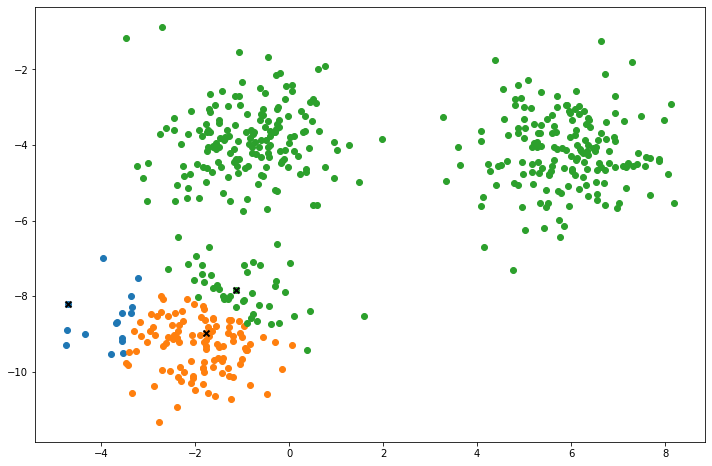

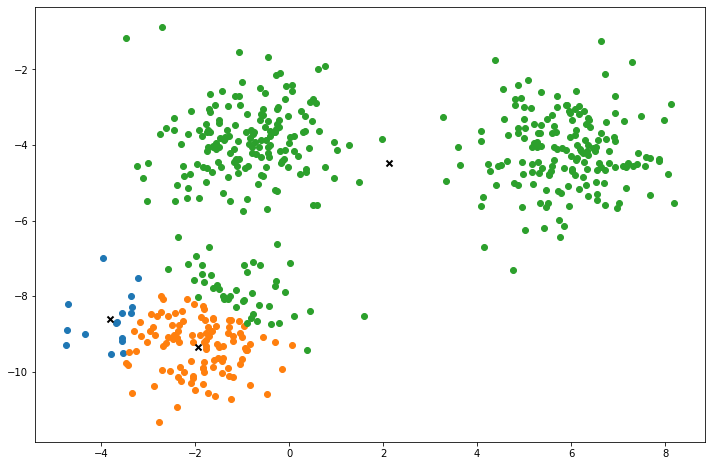

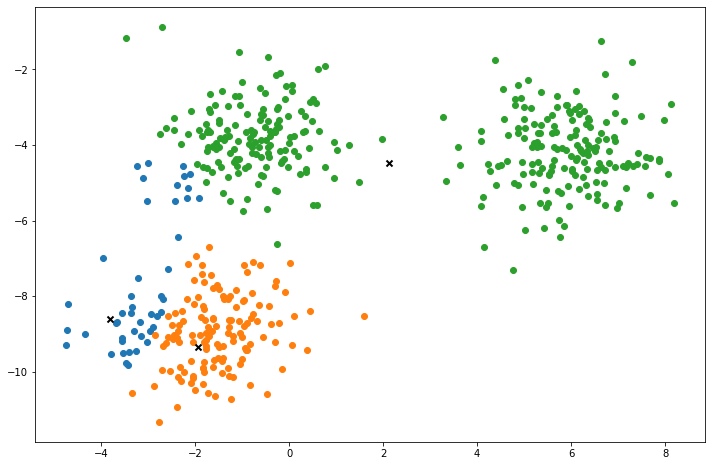

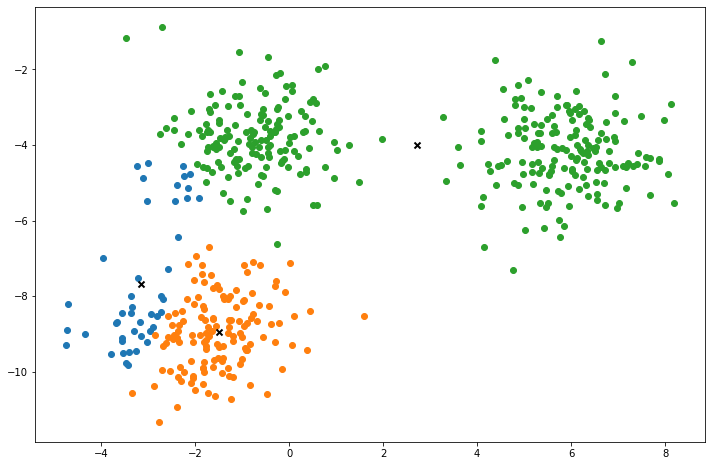

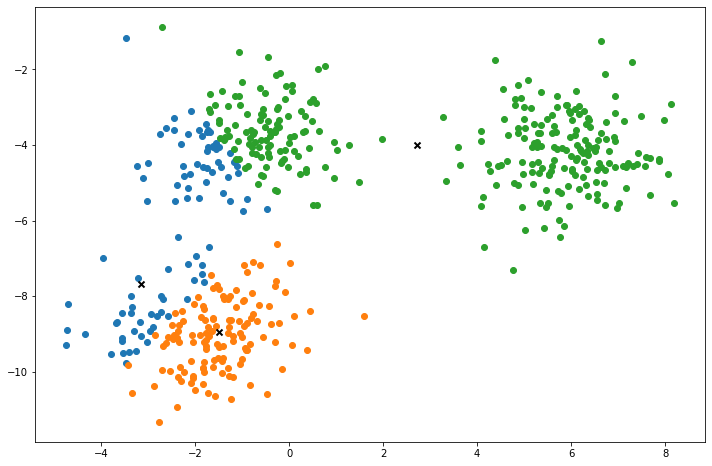

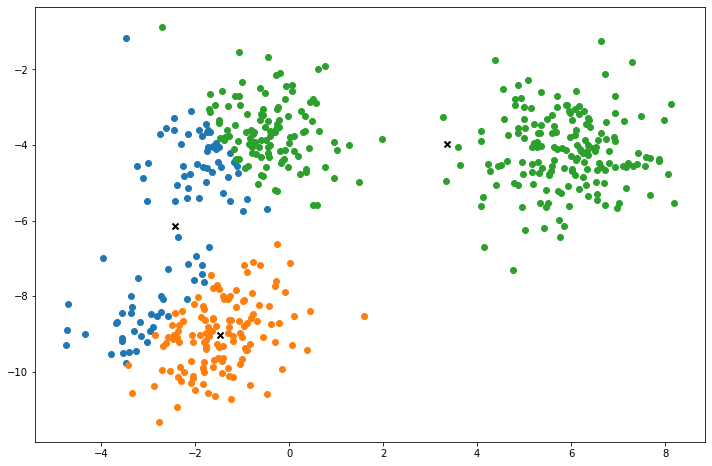

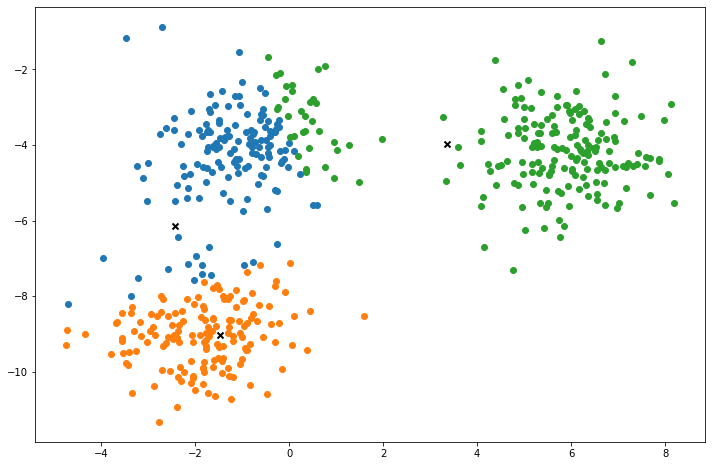

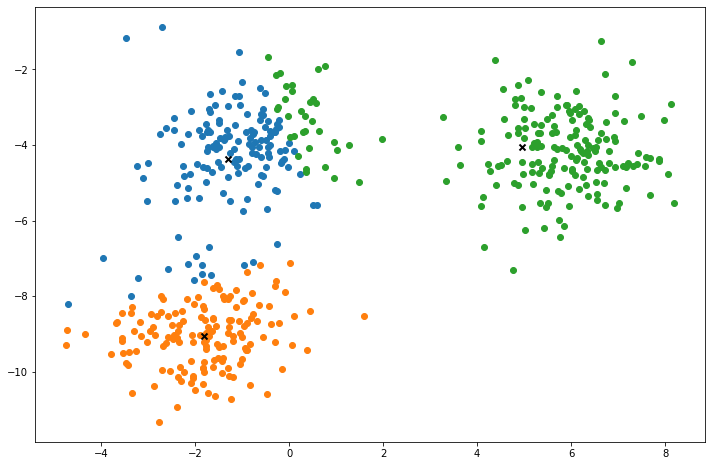

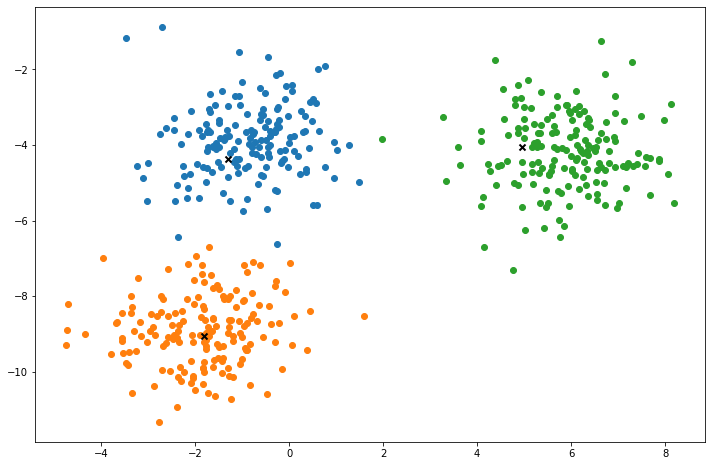

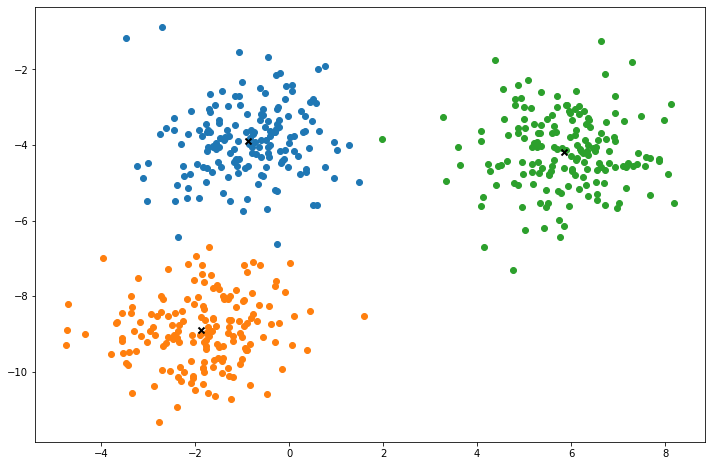

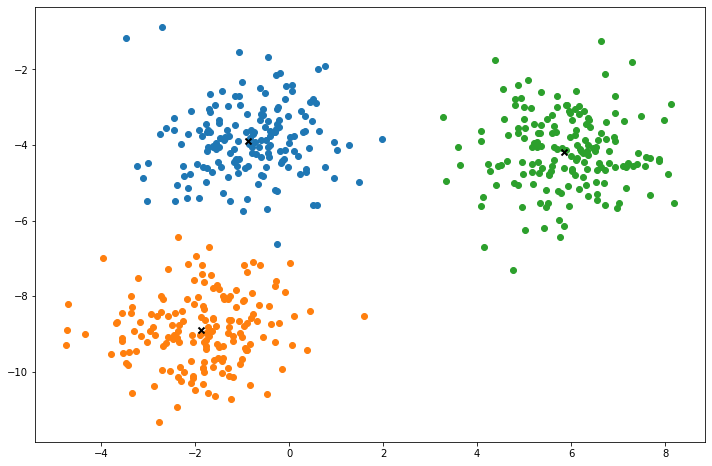

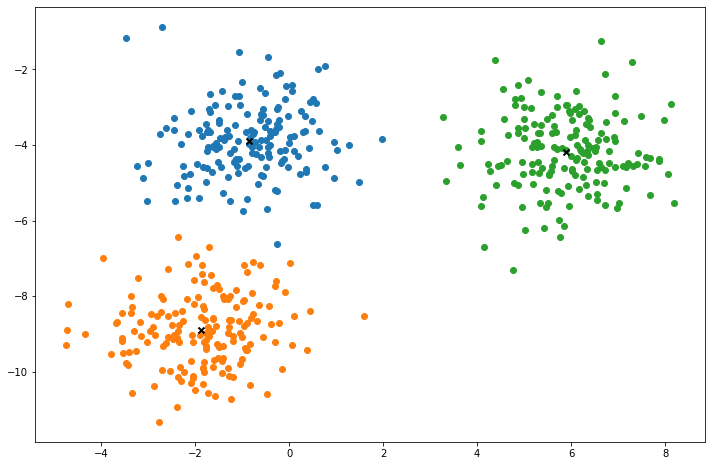

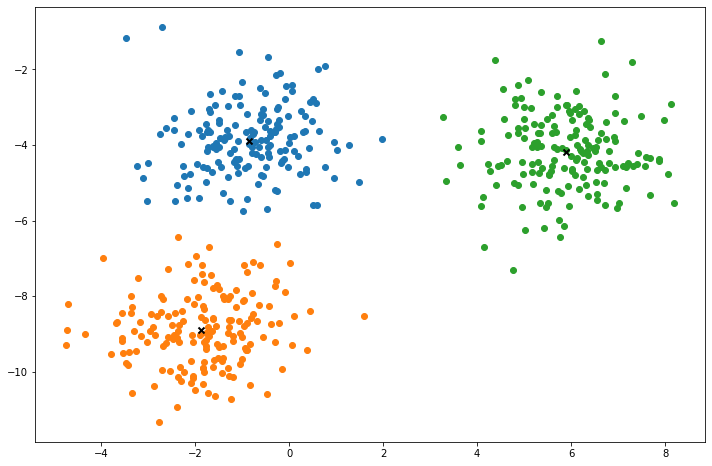

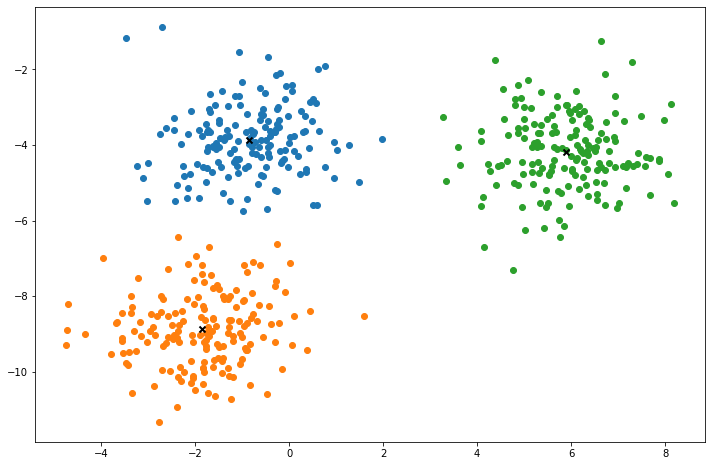

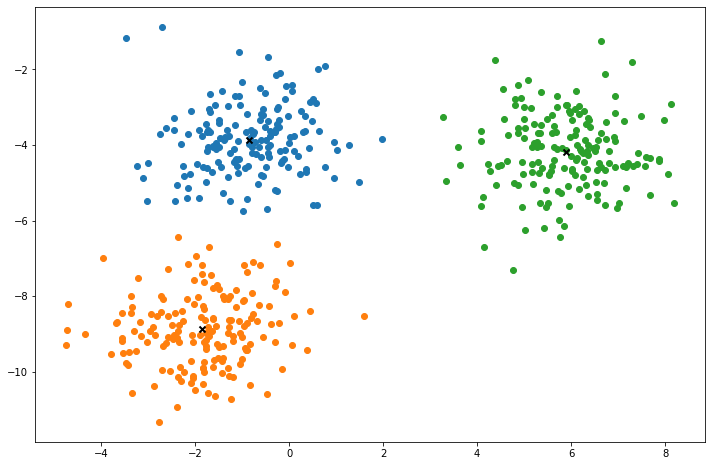

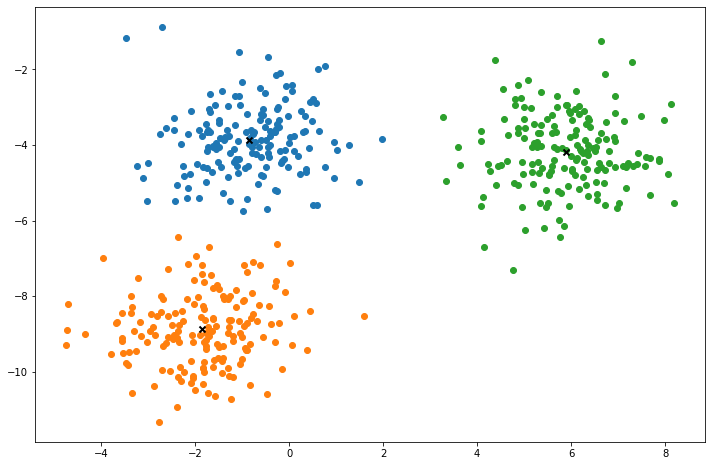

In [46]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
print(X.shape)
clusters = len(np.unique(y))
print(clusters)
k = KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred = k.predict(X)
k.plot()

In [47]:
print(y_pred)

[1. 2. 0. 0. 2. 2. 1. 1. 1. 1. 2. 2. 0. 1. 2. 0. 2. 2. 1. 0. 1. 2. 2. 2.
 1. 1. 1. 2. 1. 0. 2. 1. 2. 0. 0. 1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0.
 2. 2. 0. 0. 1. 0. 0. 2. 0. 2. 0. 2. 1. 0. 2. 1. 0. 1. 1. 2. 2. 0. 0. 1.
 2. 0. 1. 2. 2. 1. 2. 0. 1. 0. 0. 2. 0. 2. 1. 0. 0. 1. 1. 1. 2. 1. 0. 2.
 0. 1. 0. 2. 0. 2. 0. 2. 2. 1. 2. 2. 2. 0. 0. 0. 2. 2. 2. 1. 2. 1. 1. 2.
 0. 0. 2. 0. 2. 1. 0. 2. 2. 2. 2. 0. 0. 0. 2. 1. 2. 0. 2. 2. 1. 0. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 2. 1. 0. 0.
 2. 2. 1. 0. 2. 0. 0. 0. 0. 0. 0. 1. 2. 0. 2. 1. 2. 1. 0. 1. 2. 2. 0. 0.
 1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 2. 2. 2. 1. 1. 1. 0. 2. 2. 2. 2. 1. 0. 1.
 2. 0. 1. 1. 0. 2. 0. 0. 0. 2. 2. 0. 0. 1. 0. 2. 1. 2. 0. 0. 2. 2. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 2. 2. 0. 0. 1. 0. 2. 2. 2. 2. 2. 2.
 1. 2. 0. 0. 1. 2. 1. 1. 1. 0. 1. 0. 2. 0. 2. 0. 2. 1. 1. 0. 0. 0. 2. 1.
 1. 0. 0. 1. 2. 2. 1. 1. 1. 0. 2. 2. 0. 0. 2. 0. 1. 2. 2. 0. 1. 1. 2. 2.
 2. 1. 2. 0. 0. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 0. 2.

# Image segmentation using KMeans

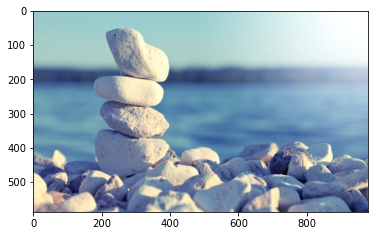

In [35]:
image = cv2.imread('rocks.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [36]:
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(576240, 3)


In [37]:
model = KMeans(K=3, max_iters=100)  
y_pred = model.predict(pixel_values) 
model.cent()

array([[109.24893188, 142.04438782, 170.37205505],
       [199.54356384, 217.11314392, 208.87756348],
       [ 68.56201172,  86.13957977, 130.16967773]])

In [39]:
centers = np.uint8(model.cent())
centers

array([[109, 142, 170],
       [199, 217, 208],
       [ 68,  86, 130]], dtype=uint8)

In [43]:
np.unique(y_pred)

array([0., 1., 2.])

In [44]:
y_pred = y_pred.astype(int)

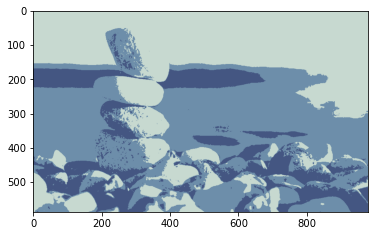

In [45]:
labels = y_pred.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()